Missing data for 2021-05-04 00:00:00


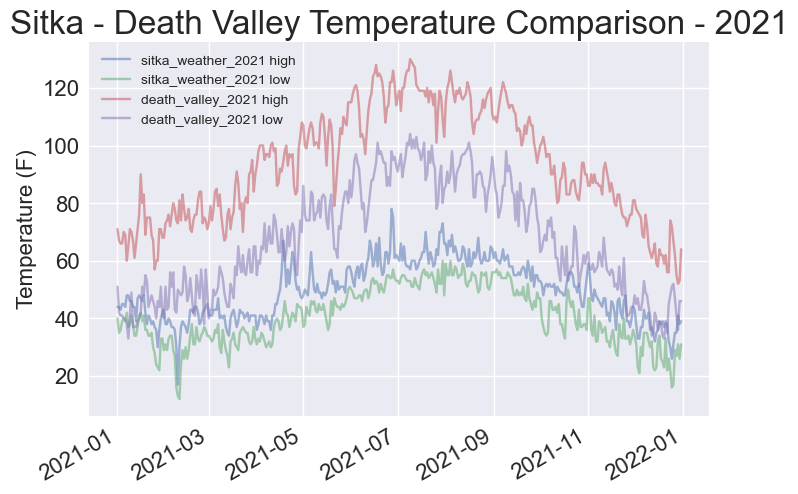

In [18]:
import csv
from datetime import datetime

import matplotlib.pyplot as plt

def read_data_from_csv(file_path, tmin_index, tmax_index, date_index=2):
    with open(file_path) as f:
        reader = csv.reader(f)
        next(reader)

        dates, highs, lows = [], [], []
        for row in reader:
            current_date = datetime.strptime(row[date_index], '%Y-%m-%d')
            try:
                high = float(row[tmax_index])
                low = float(row[tmin_index])
            except ValueError:
                print(f"Missing data for {current_date}")
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)
    return {
        'dates': dates,
        'highs': highs,
        'lows': lows,
        'label': file_path.split('/')[-1].replace('_simple.csv', ''),
    }

plt.style.use('seaborn')
fig, ax = plt.subplots()

data_sets = [
    ('weather_data/sitka_weather_2021_simple.csv', 5, 4),
    ('weather_data/death_valley_2021_simple.csv', 4, 3)
]

for data_set in data_sets:
    data = read_data_from_csv(*data_set)
    ax.plot(data['dates'], data['highs'], alpha=0.5, label=data['label'] + ' high')
    ax.plot(data['dates'], data['lows'], alpha=0.5, label=data['label'] + ' low')

ax.set_title("Sitka - Death Valley Temperature Comparison - 2021", fontsize= 24)
ax.set_xlabel("", fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=16)

plt.legend(loc="upper left")

plt.show()

